**Leo Qian**

Fall 2021

CS 251: Data Analysis and Visualization

# Lab 6B: Naive Bayes and K-Nearest Neighbor

In this lab we will be using the library scikit-learn to train a Gaussian Naive Bayes classifier and graph the results.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, preprocessing, model_selection, decomposition
from sklearn import neighbors, naive_bayes, metrics
import matplotlib.pyplot as plt

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

## Task 1: Load the digits dataset

We're going to be seeing if we can use Naive Bayes and K-Nearest Neighbor to classify hand writing data.  The [digits dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html) is a set of 1797 8x8 pixel images, representing handwriting samples of the numbers 0-9.  This is just a small sample of the [MNIST handwriting dataset](http://yann.lecun.com/exdb/mnist/).

1. Load the [digits dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). Use the `return_X_y` parameter so that it returns both the X data and y classifications.
2. Use [train test split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to split the X data and y classifications, into an X_training dataset, X_testing dataset and the corresponding y_training labels and y_testing labels.  Set the test size be .3 and shuffle to True.
4. Print the shape of X_training, X_testing, y_training, and y_testing.

In [17]:
np.random.seed(42)

x_data, y_class = datasets.load_digits(return_X_y=True)

x_training, x_testing, y_training, y_testing = model_selection.train_test_split(x_data,y_class,test_size=0.3)

print(x_training.shape)
print(x_testing.shape)
print(y_training.shape)
print(y_testing.shape)

print('''
X training data shape:  (1257, 64)
X testing data shape:   (540, 64)
y training labels shape:(1257,)
y testing labels shape: (540,)
''')

(1257, 64)
(540, 64)
(1257,)
(540,)

X training data shape:  (1257, 64)
X testing data shape:   (540, 64)
y training labels shape:(1257,)
y testing labels shape: (540,)



## Task 2: Create Classifiers and Calculate Accuracy

### Create a Naive Bayes Classifier
1. Create a [Gaussian Naive Bayes Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) [(More Info)](https://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes). 
2. Use the fit method with the training dataset as X and the y training dataset labels as the target.
3. Calculate the accuracy of the classifier with the test data and test dataset labels using the score method.
4. Print the accuracy of the Naive Bayes classifier.

### Create a K-NN Classifier
1. Using the lab from last week as reference, create a [K-Nearest Neighbors Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) [(More Info)](https://scikit-learn.org/stable/modules/neighbors.html#classification).  Set n_neighbors equal to 7.
1. Assign your classifier to a variable with a **different** name than your Naive Bayes classifier.  
2. Use the fit method with the training dataset as X and the y training dataset labels as the target.
3. Calculate the accuracy of the classifier with the test data and test dataset labels using the score method.
4. Print the accuracy of the K-NN classifier.


In [28]:
naive_bayes_classifier = naive_bayes.GaussianNB()
naive_bayes_classifier.fit(x_training,y_training)
accuracy = naive_bayes_classifier.score(x_testing, y_testing)
print(f'naive bayes accuracy: {accuracy:.5f}')

naive bayes accuracy: 0.85185


In [31]:
knn_classifier = neighbors.KNeighborsClassifier()
knn_classifier.fit(x_training,y_training)
accuracy = knn_classifier.score(x_testing, y_testing)
print(f'knn accuracy: {accuracy:.5f}')

knn accuracy: 0.99259


In [20]:

print('''
Gaussian Naive Bayes Classifier Accuracy: 0.85185...
K-Nearest Neighbor Classifier Accuracy:   0.99074...
''')


Gaussian Naive Bayes Classifier Accuracy: 0.85185...
K-Nearest Neighbor Classifier Accuracy:   0.99074...



## Task 3: Create a confusion matrix for each classifier

1. Find the predicted labels for the X test data using the predict method for the Naive Bayes classifier and K-NN classifier.
1. Create a [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) for each classifier, using the predicted labels and actual labels.  
1. Print the confusion matrices.
2. Visualize the confusion matrices using imshow. For reference, use Lab 4a and this [matplotlib example](https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html) of an annotated heatmap.
    1. Set x_ticks and y_ticks to align with the list of digits.
    2. Use imshow to draw the matrix
    3. Choose a perceptually uniform [colormap](https://matplotlib.org/tutorials/colors/colormaps.html)
    3. Use a colorbar to label the matrix
    4. Remember to call `plt.show()` at the end, or other plots later might not work.
    5. Give your plot a meaningful title.
    
#### Review Question: Which digits are most likely to be misclassified and what are they most likely to be misclassified as?

In [21]:
naive_confusion = metrics.confusion_matrix(y_testing,naive_bayes_classifier.predict(x_testing))
knn_confusion = metrics.confusion_matrix(y_testing,knn_classifier.predict(x_testing))
print('naive_confusion')
print(naive_confusion)

print("knn_confusion")
print(knn_confusion)
print('''
K-Nearest Neighbor Confusion Matrix
 [[53  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 54  0  0  0  0  0  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  0 64  1  0  0  1]
 [ 0  0  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 55  0  0]
 [ 0  0  0  0  0  0  0  0 43  0]
 [ 0  0  0  1  1  1  0  0  0 56]]
 Gaussian Naive Bayes Confusion Matrix
[[52  0  0  0  0  0  0  1  0  0]
 [ 0 37  2  0  0  0  0  2  6  3]
 [ 0  3 31  0  0  0  1  0 12  0]
 [ 0  0  2 41  0  0  1  0  8  2]
 [ 0  0  0  0 51  0  2  7  0  0]
 [ 0  0  0  1  0 62  1  2  0  0]
 [ 0  0  0  0  1  1 51  0  0  0]
 [ 0  0  0  0  0  1  0 54  0  0]
 [ 0  2  0  0  0  0  0  2 39  0]
 [ 0  1  1  1  0  2  1  7  4 42]]
''')

naive_confusion
[[52  0  0  0  0  0  0  1  0  0]
 [ 0 37  2  0  0  0  0  2  6  3]
 [ 0  3 31  0  0  0  1  0 12  0]
 [ 0  0  2 41  0  0  1  0  8  2]
 [ 0  0  0  0 51  0  2  7  0  0]
 [ 0  0  0  1  0 62  1  2  0  0]
 [ 0  0  0  0  1  1 51  0  0  0]
 [ 0  0  0  0  0  1  0 54  0  0]
 [ 0  2  0  0  0  0  0  2 39  0]
 [ 0  1  1  1  0  2  1  7  4 42]]
knn_confusion
[[53  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 54  0  0  0  0  0  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  0 65  0  0  0  1]
 [ 0  0  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 55  0  0]
 [ 0  0  0  0  0  0  0  0 43  0]
 [ 0  0  0  1  1  1  0  0  0 56]]

K-Nearest Neighbor Confusion Matrix
 [[53  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 54  0  0  0  0  0  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  0 64  1  0  0  1]
 [ 0  0  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 55  0  0]
 [ 0  

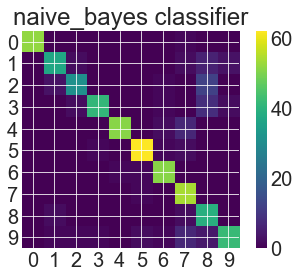

In [24]:
ticks_range = np.arange(10)
plt.figure()
plt.imshow(naive_confusion,cmap="viridis")
plt.colorbar()
plt.title("naive_bayes classifier")
plt.xticks(ticks_range)
plt.yticks(ticks_range)
plt.show()

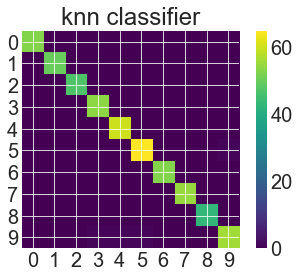

In [25]:
plt.figure()
plt.imshow(knn_confusion,cmap="viridis")
plt.colorbar()
plt.title("knn classifier")
plt.xticks(ticks_range)
plt.yticks(ticks_range)
plt.show()